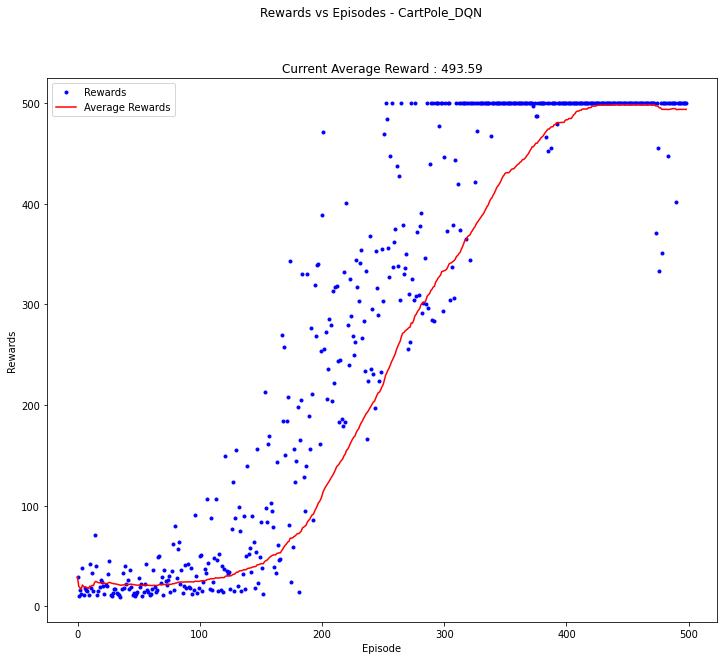

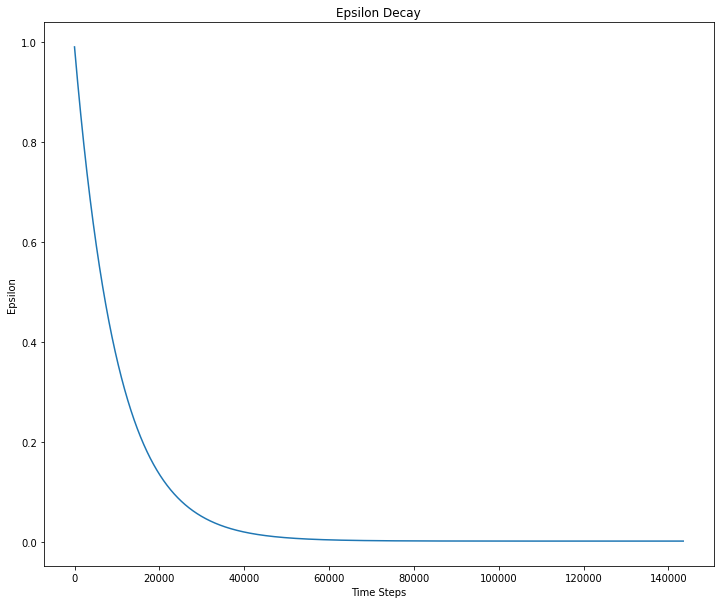

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gym
from dqn import Options,DQN,DuelingDQN,Hyperparams
from gridEnvironment import GridEnvironment


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class NeuralNetworkForCartPole(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 128)
        self.layer_2 = nn.Linear(128, 128)
        self.layer_3 = nn.Linear(128, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)

dqnCartPole = DQN(
    env=gym.make('CartPole-v1'),
    hyperparams=Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=10000,
        memorySize=10000,
        learningRate=1e-4,
        batchSize=128,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=20,
        episodes=500
    ),
    nnModel=NeuralNetworkForCartPole,
    options = Options(
        resultsPath='./results',
        filePrefix='CartPole_DQN',
        showLiveResults=True,
        logResults = False
    )
)

dqnCartPole.train()


In [2]:
import pickle

In [ ]:
with open('CartPole_DQN_policy_weights.pkl', 'wb') as f:
    pickle.dump(dqn.policyNetwork.state_dict(), f)